# Thêm thư viện

In [2]:
import pandas as pd
#đọc dữ liệu từ csv
import pandas as  pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model


# Đọc file dữ liệu

In [4]:
dt = pd.read_csv("Housing_2019.csv", index_col=0)


### Kiểm tra dữ liệu

In [5]:
dt.iloc[2:4,]
print(dt.head(5))



     price  lotsize  bedrooms  bathrms  stories driveway recroom fullbase  \
1  42000.0     5850         3        1        2      yes      no      yes   
2  38500.0     4000         2        1        1      yes      no       no   
3  49500.0     3060         3        1        1      yes      no       no   
4  60500.0     6650         3        1        2      yes     yes       no   
5  61000.0     6360         2        1        1      yes      no       no   

  gashw airco  garagepl prefarea  
1    no    no         1       no  
2    no    no         0       no  
3    no    no         0       no  
4    no    no         0       no  
5    no    no         0       no  


### Giá trị X từ các cột lotsize,bedrooms,bathrms,stories,garagepl

In [8]:
X=dt.iloc[:,[1,2,3,4,10]]
print(X)

     lotsize  bedrooms  bathrms  stories  garagepl
1       5850         3        1        2         1
2       4000         2        1        1         0
3       3060         3        1        1         0
4       6650         3        1        2         0
5       6360         2        1        1         0
..       ...       ...      ...      ...       ...
542     4800         3        2        4         0
543     6000         3        2        4         0
544     6000         3        2        4         1
545     6000         3        2        2         1
546     6000         3        1        2         1

[546 rows x 5 columns]


### Kiểm tra dữ liệu X

In [9]:
X.iloc[1:5,]
print(X)

     lotsize  bedrooms  bathrms  stories  garagepl
1       5850         3        1        2         1
2       4000         2        1        1         0
3       3060         3        1        1         0
4       6650         3        1        2         0
5       6360         2        1        1         0
..       ...       ...      ...      ...       ...
542     4800         3        2        4         0
543     6000         3        2        4         0
544     6000         3        2        4         1
545     6000         3        2        2         1
546     6000         3        1        2         1

[546 rows x 5 columns]


### Gán giá trị của Y & kiểm tra Y

In [10]:
Y = dt.price
print(Y)

1       42000.0
2       38500.0
3       49500.0
4       60500.0
5       61000.0
         ...   
542     91500.0
543     94000.0
544    103000.0
545    105000.0
546    105000.0
Name: price, Length: 546, dtype: float64


### In biểu đồ trực quan

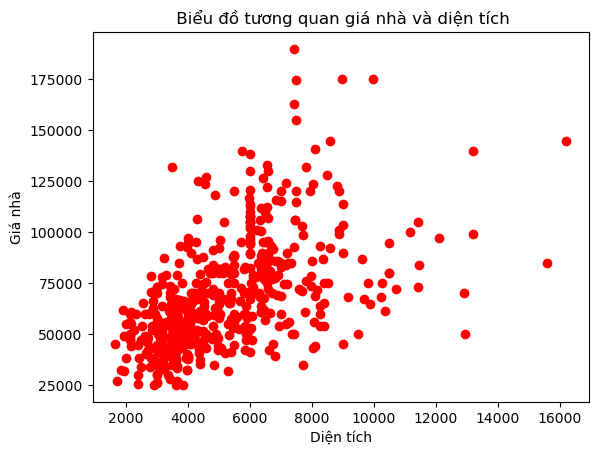

In [12]:
plt.title(" Biểu đồ tương quan giá nhà và diện tích")
plt.ylabel("Giá nhà")
plt.xlabel("Diện tích")
plt.scatter(dt.lotsize, dt.price, c="red")
plt.show()

### Huấn luyện mô hình

In [13]:
lm = linear_model.LinearRegression()
lm.fit(X[1:520],Y[1:520])
print(round(lm.intercept_,3))
print(lm.coef_)

-2491.446
[4.82266765e+00 2.52678232e+03 1.65410681e+04 7.36009997e+03
 5.16769575e+03]


### Dự báo giá nhà cho 20 phần tử cuối cùng trong tập dữ liệu

In [14]:
y = dt.price
y_test =Y[-20:]
x_test=X[-20:]
y_pred = lm.predict(x_test)

### So sánh giá trị dự báo và giá trị thực tế

In [15]:
print("Y_pred",y_pred)
print("y_test: ",y_test)


Y_pred [102783.56717938  86741.43780532 101715.13892973  89187.34320822
  90341.766572    95164.43422345 101537.87346273  66057.09282124
  67823.60744563  95582.90964604  96547.44317633  66859.07391534
  91598.67703395  90719.94686085 104247.03944674  90760.24199458
  96547.44317633 101715.13892973  86994.93899351  70453.87088238]
y_test:  527    105000.0
528    106000.0
529    107500.0
530    108000.0
531    113750.0
532    120000.0
533     70000.0
534     71000.0
535     82000.0
536     82000.0
537     82500.0
538     83000.0
539     84000.0
540     85000.0
541     85000.0
542     91500.0
543     94000.0
544    103000.0
545    105000.0
546    105000.0
Name: price, dtype: float64


### Đánh giá

In [18]:
from sklearn.metrics import mean_squared_error
err = mean_squared_error(y_test,y_pred)
print("Chỉ số MSE: ",round(err,3))
print("Chỉ số RMSE: ",np.sqrt(err))

Chỉ số MSE:  288877136.084
Chỉ số RMSE:  16996.385971252897
